<a href="https://colab.research.google.com/github/ShivamGupta82/DAV_Lab/blob/master/Experiment03/DAV_Exp03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIM: Multiple Linear Regression in Python and R**

## Multiple Linear Regression in Python

### 1. Loading the [dataset](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [ ]:
# Listing all the cars
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
# create a function to fix the CarName column
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()

In [ ]:
# apply the clean_car_name function to the CarName column
df['CarName'] = df['CarName'].apply(clean_car_name)

In [ ]:
# see the unique values after fixing
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# Fix typos
df['CarName'] = df['CarName'].str.replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')

In [ ]:
# see the unique values after fixing typos
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

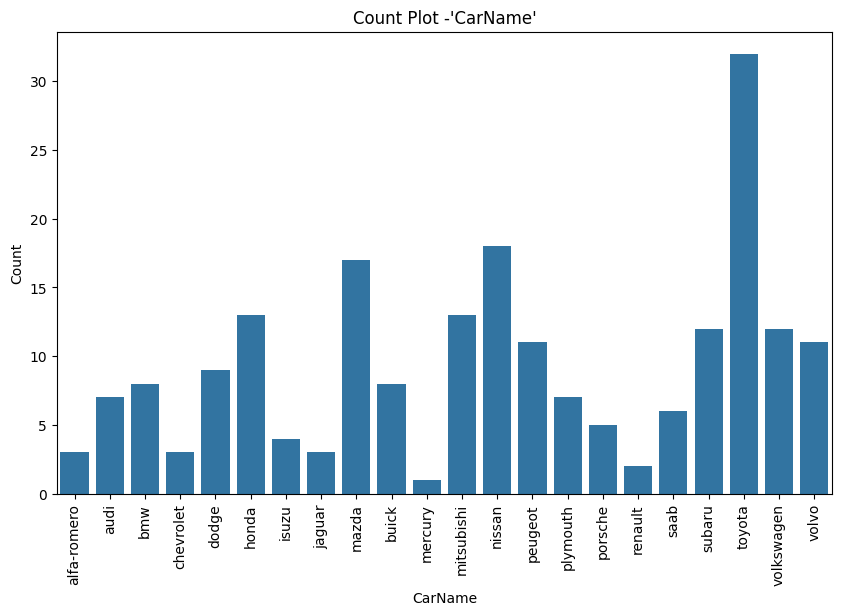

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CarName')
plt.title(f"Count Plot -'CarName'")
plt.xlabel('CarName')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

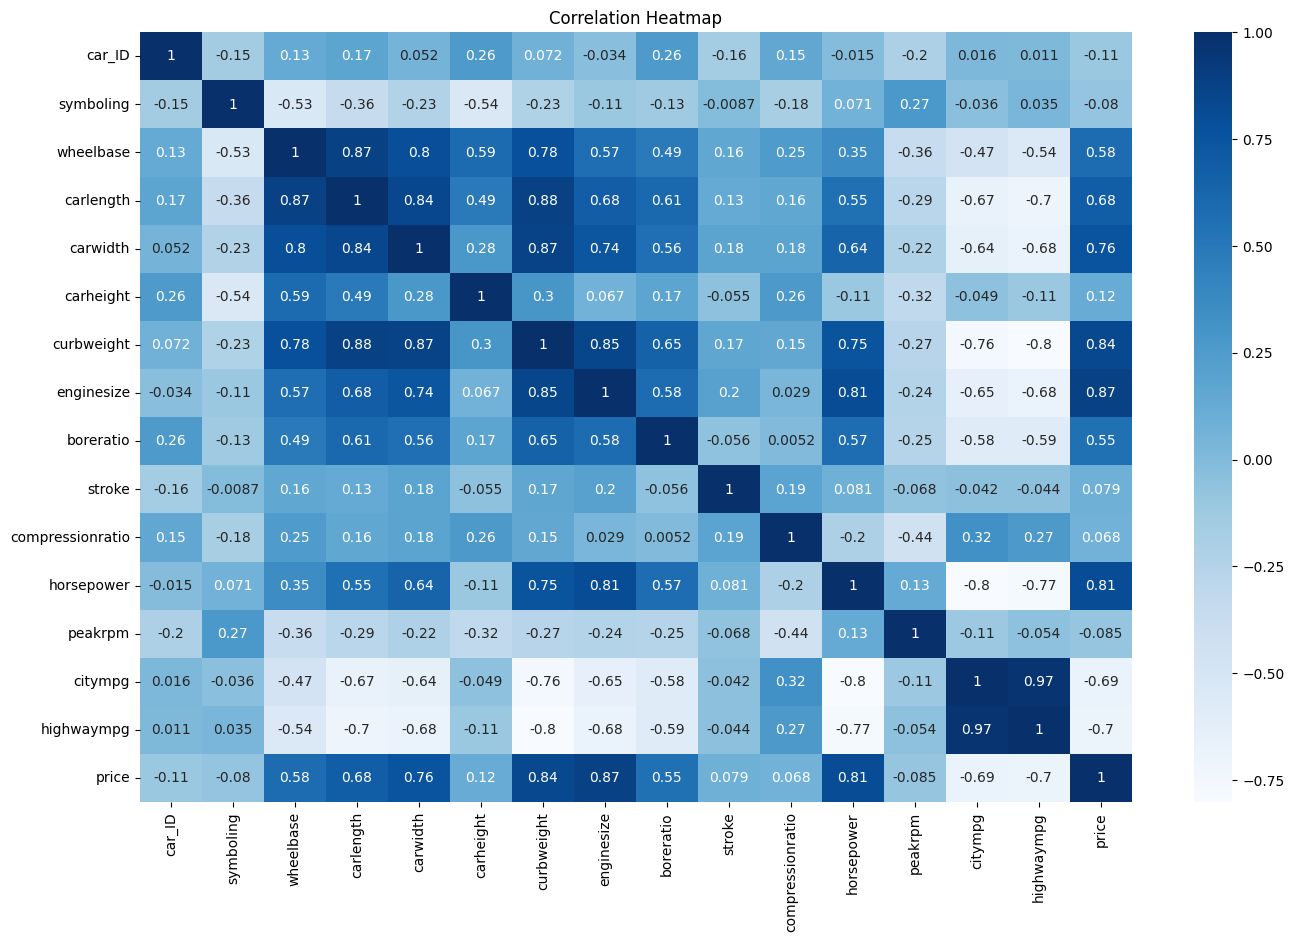

In [ ]:
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df = df.drop(['car_ID','symboling'],axis = 1)

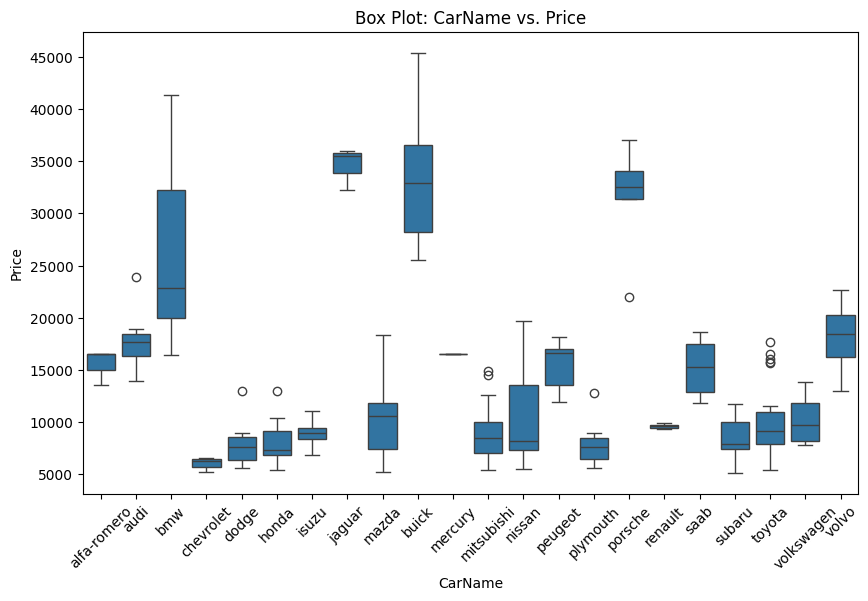

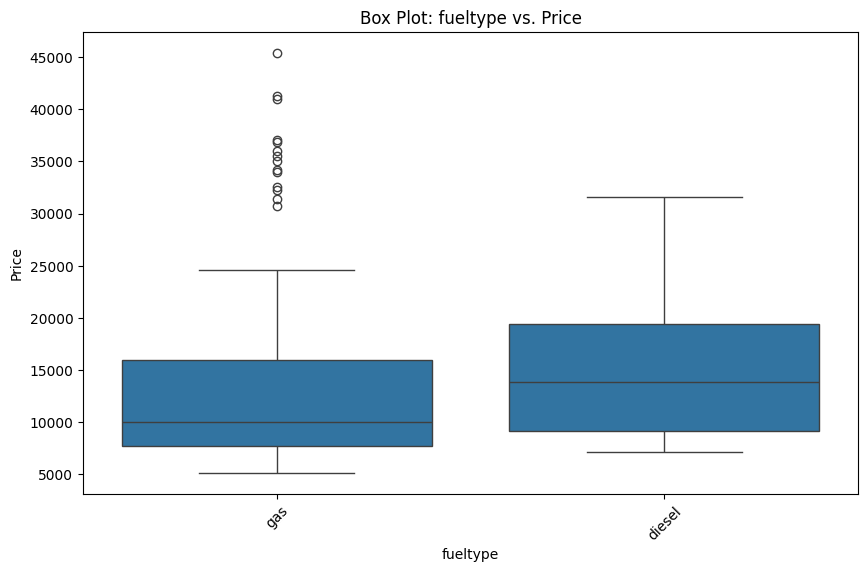

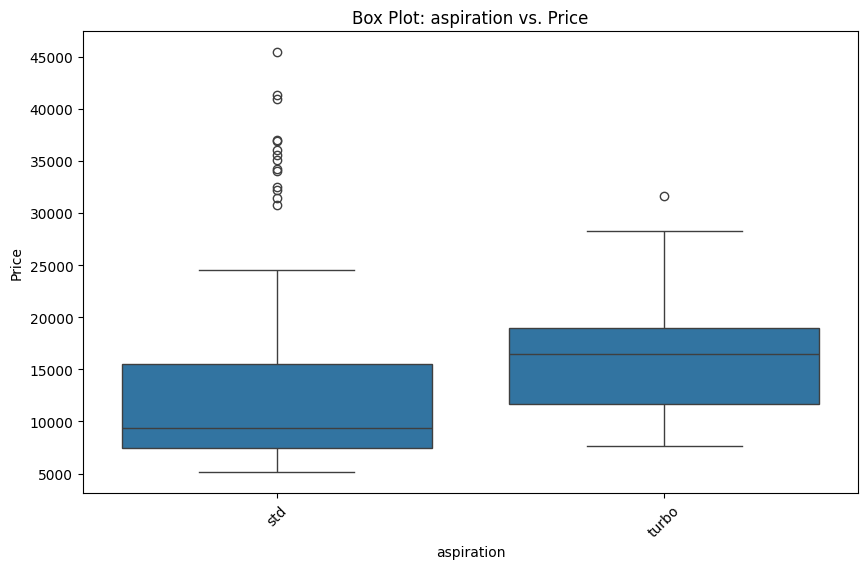

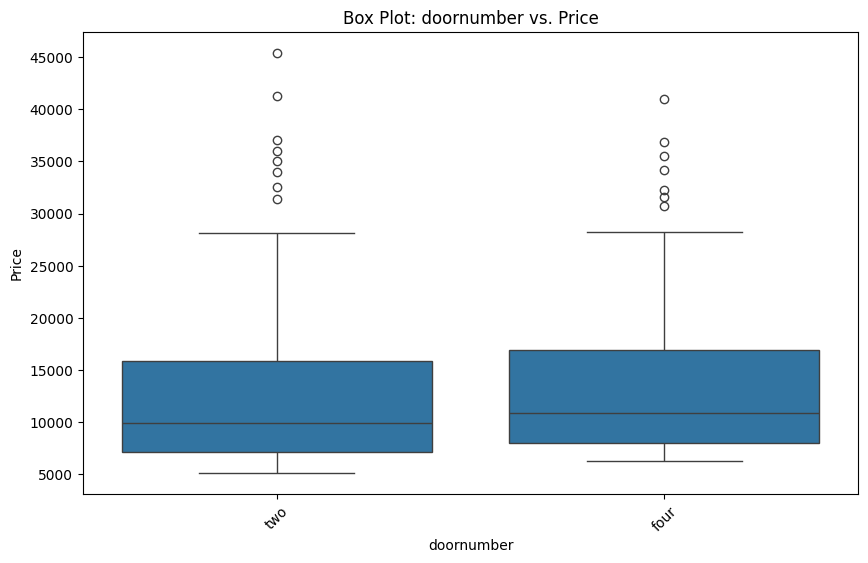

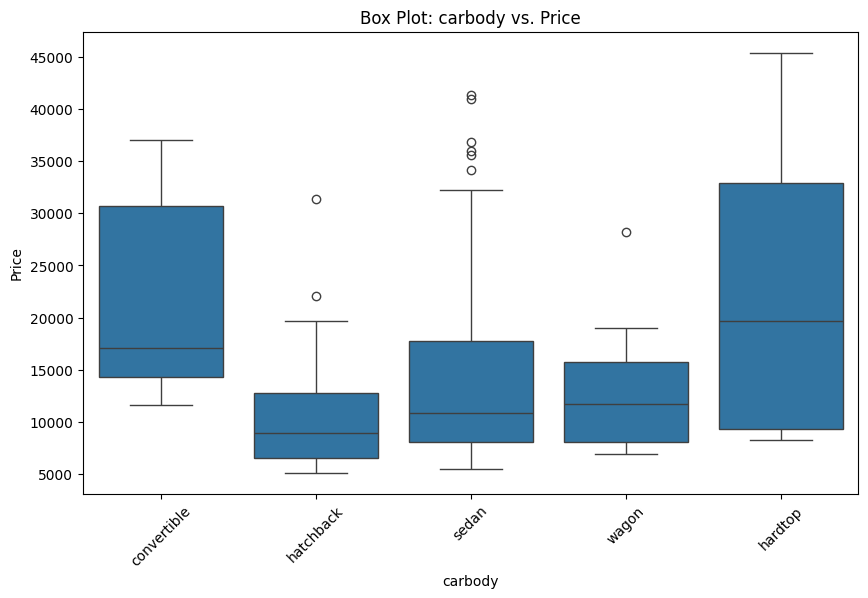

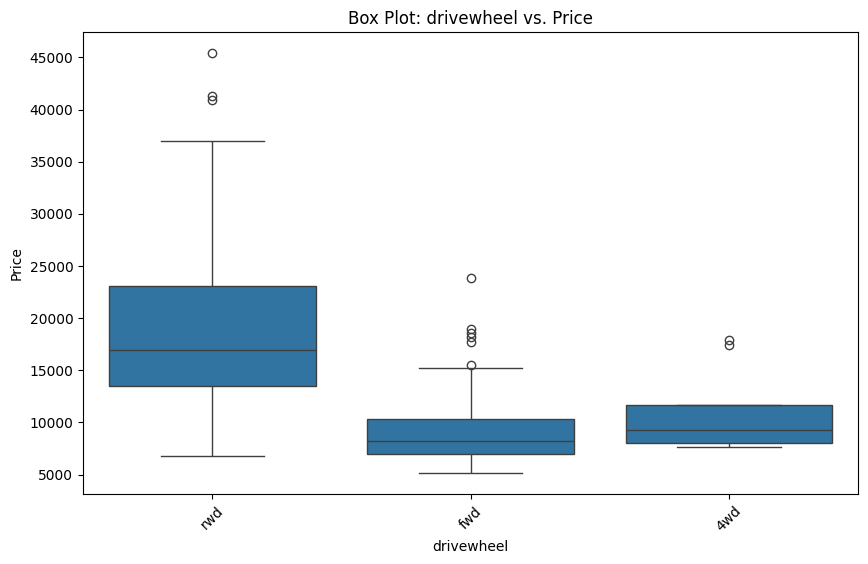

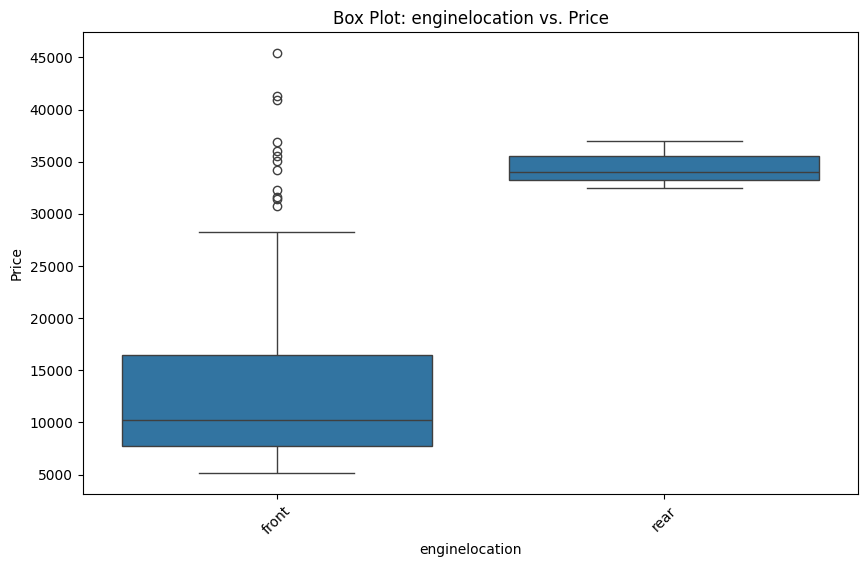

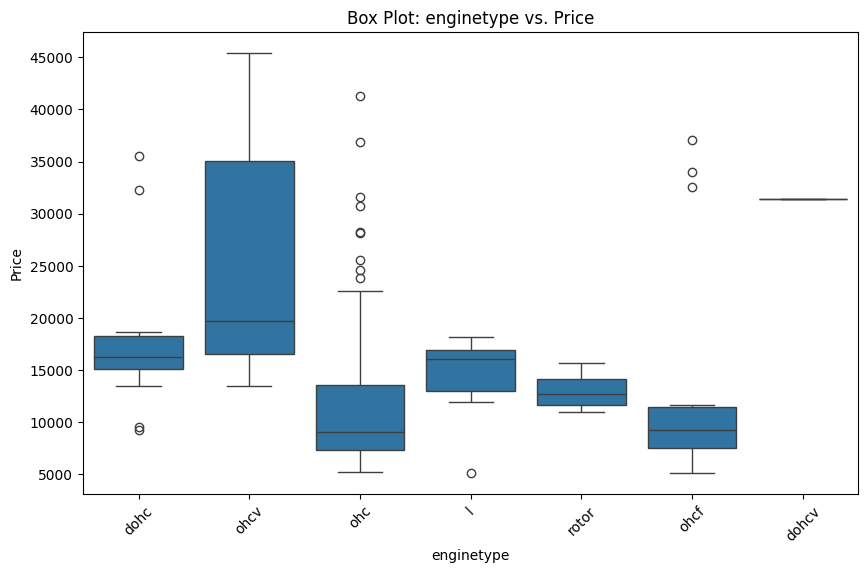

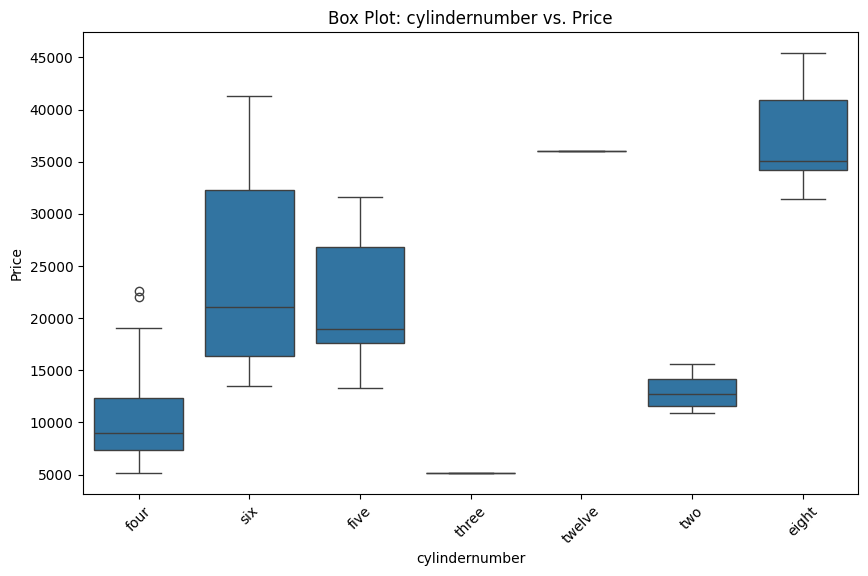

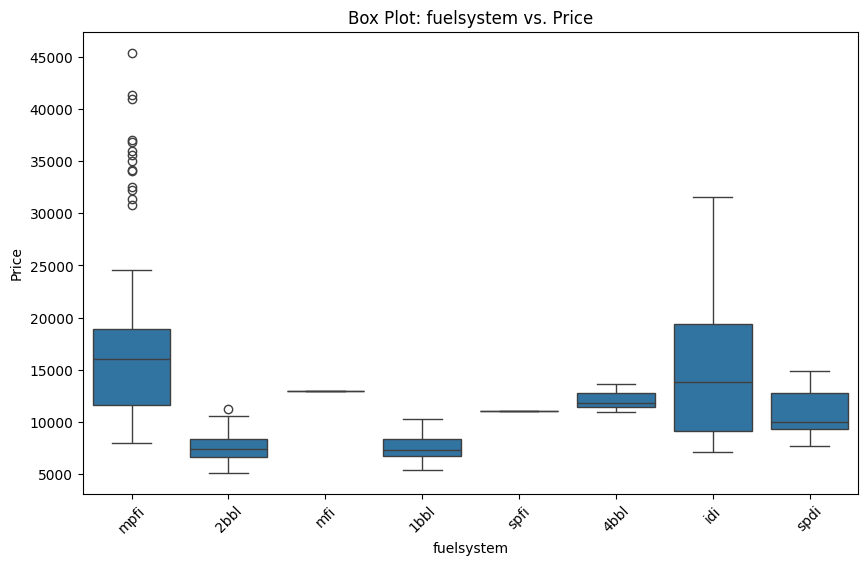

In [ ]:
categorical_columns = df.select_dtypes(include=object).columns.tolist()
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f'Box Plot: {column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

### Data cleaning and model training

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import re

# use label encoder to encode the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# use scaler to scale the numerical columns
scaler = StandardScaler()
numerical_columns.remove('car_ID')
numerical_columns.remove('symboling')
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
X = df.drop(['price', 'CarName'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.8961468790198356

In [ ]:
y_pred = model.predict(X_test)

### Coefficient of Determination, Intercept and Coefficients

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
intercept = model.intercept_
coefficients = model.coef_
equation = f'y = {intercept}'
for i, coef in enumerate(coefficients):
    equation += f' + ({coef} * X_{i+1})'
print("Linear Regression Equation:")
print(equation)
print("Intercept:", intercept)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

Linear Regression Equation:
y = -0.18204577985821635 + (0.43225969463180564 * X_1) + (0.08474821394981494 * X_2) + (-0.15465472039434688 * X_3) + (-0.13369606580632193 * X_4) + (0.1270755421313615 * X_5) + (1.3824289404913508 * X_6) + (0.13045616359836149 * X_7) + (-0.07825304983241206 * X_8) + (0.16939976701519538 * X_9) + (0.02759819622342905 * X_10) + (0.12058160056905433 * X_11) + (0.04117791027575867 * X_12) + (-0.05465281520301061 * X_13) + (0.4919945874302822 * X_14) + (-0.005313133654791701 * X_15) + (-0.08150756093730371 * X_16) + (-0.08470294059574586 * X_17) + (0.21551625471063957 * X_18) + (0.049929334151228376 * X_19) + (0.10830008086762685 * X_20) + (-0.23679844547212972 * X_21) + (0.0875151396691694 * X_22)
Intercept: -0.18204577985821635
 R-squared: 0.7982475638042225
Mean Squared Error: 0.2507800223193133


### Predicting the response

In [ ]:
df_x = pd.DataFrame(X_test, columns=X_train.columns)
df_x['Y_actual'] = y_test
df_x['Y_predicted'] = y_pred
df_x['Error'] = (y_pred - y_test)
print(df_x)

     fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  \
15          1           0           0        3           2               0   
9           1           1           1        2           0               0   
100         1           0           0        3           1               0   
132         1           0           1        2           1               0   
68          0           1           0        4           2               0   
95          1           0           1        2           1               0   
159         0           0           0        2           1               0   
162         1           0           0        3           1               0   
147         1           0           0        4           1               0   
182         0           0           1        3           1               0   
191         1           0           0        3           1               0   
164         1           0           1        2           2      

### Visualizing the results

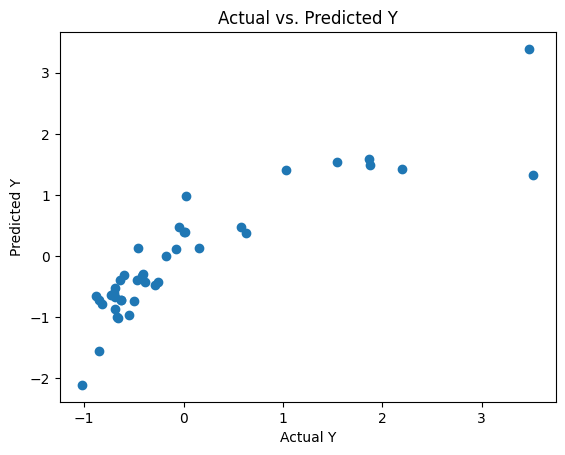

In [ ]:
plt.scatter(df_x['Y_actual'], df_x['Y_predicted'])
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Y')
plt.show()

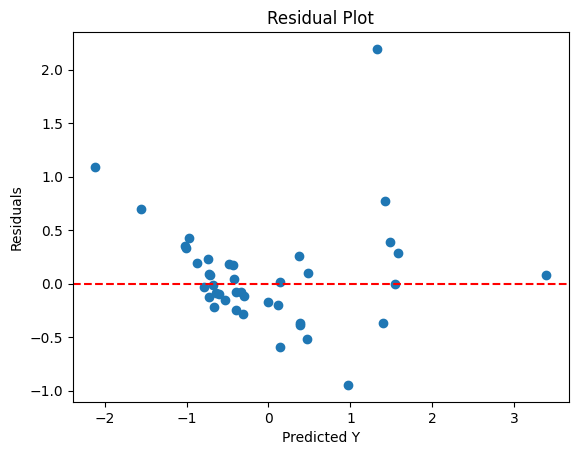

In [ ]:
residuals = df_x['Y_actual'] - df_x['Y_predicted']
plt.scatter(df_x['Y_predicted'], residuals)
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()

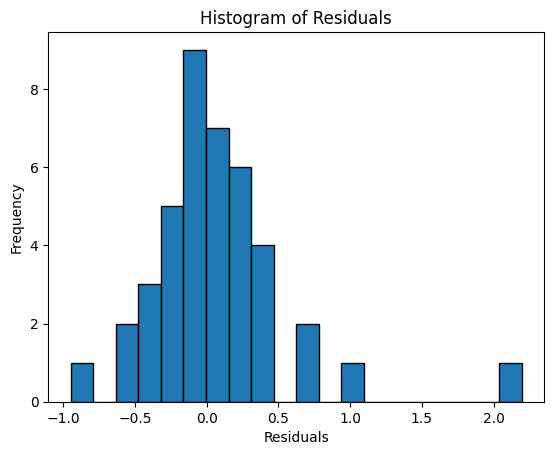

In [ ]:
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

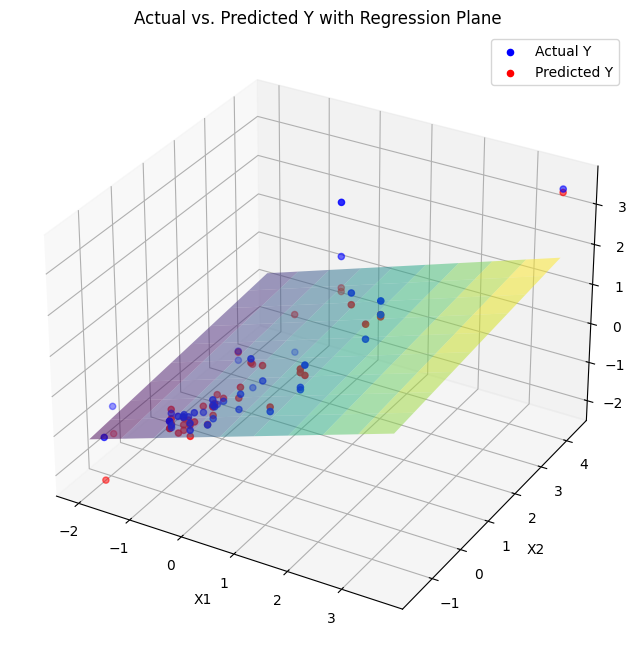

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Generating sample data for plotting
x1_min, x1_max = df_x['wheelbase'].min(), df_x['wheelbase'].max()
x2_min, x2_max = df_x['enginesize'].min(), df_x['enginesize'].max()
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 10), np.linspace(x2_min, x2_max, 10))

# Calculate corresponding predicted Y values
Y_predicted_plane = intercept + coefficients[0] * X1 + coefficients[1] * X2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual values
ax.scatter(df_x['wheelbase'], df_x['enginesize'], df_x['Y_actual'], color='blue', label='Actual Y')

# Plotting predicted values
ax.scatter(df_x['wheelbase'], df_x['enginesize'], df_x['Y_predicted'], color='red', label='Predicted Y')
ax.plot_surface(X1, X2, Y_predicted_plane, alpha=0.5, cmap='viridis')
# Setting labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Actual vs. Predicted Y with Regression Plane')

# Adding a legend
ax.legend()
plt.show()

# Multiple Linear Regression in R

### 1. Loading the [dataset](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data)

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df <- read.csv('/content/CarPrice_Assignment.csv')

In [ ]:
head(df)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
tail(df)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
200,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,⋯,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
201,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
202,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
203,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,⋯,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
204,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,⋯,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
205,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
summary(df)

     car_ID      symboling         CarName            fueltype        
 Min.   :  1   Min.   :-2.0000   Length:205         Length:205        
 1st Qu.: 52   1st Qu.: 0.0000   Class :character   Class :character  
 Median :103   Median : 1.0000   Mode  :character   Mode  :character  
 Mean   :103   Mean   : 0.8341                                        
 3rd Qu.:154   3rd Qu.: 2.0000                                        
 Max.   :205   Max.   : 3.0000                                        
  aspiration         doornumber          carbody           drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [ ]:
unique_cars <- unique(df$CarName)
print(unique_cars)

  [1] "alfa-romero giulia"              "alfa-romero stelvio"            
  [3] "alfa-romero Quadrifoglio"        "audi 100 ls"                    
  [5] "audi 100ls"                      "audi fox"                       
  [7] "audi 5000"                       "audi 4000"                      
  [9] "audi 5000s (diesel)"             "bmw 320i"                       
 [11] "bmw x1"                          "bmw x3"                         
 [13] "bmw z4"                          "bmw x4"                         
 [15] "bmw x5"                          "chevrolet impala"               
 [17] "chevrolet monte carlo"           "chevrolet vega 2300"            
 [19] "dodge rampage"                   "dodge challenger se"            
 [21] "dodge d200"                      "dodge monaco (sw)"              
 [23] "dodge colt hardtop"              "dodge colt (sw)"                
 [25] "dodge coronet custom"            "dodge dart custom"              
 [27] "dodge coronet custom (sw)"     

In [ ]:
# Define a function to clean the CarName column
clean_car_name <- function(car_name) {
  car_name <- tolower(strsplit(car_name, " ")[[1]][1])
  return(car_name)
}
# Apply the clean_car_name function to the CarName column
df$CarName <- sapply(df$CarName, clean_car_name)

In [ ]:
# See the unique values after fixing
unique_cars <- unique(df$CarName)
print(unique_cars)
# Fix typos
df$CarName <- gsub('vw', 'volkswagen', df$CarName)
df$CarName <- gsub('vokswagen', 'volkswagen', df$CarName)
df$CarName <- gsub('toyouta', 'toyota', df$CarName)
df$CarName <- gsub('maxda', 'mazda', df$CarName)
df$CarName <- gsub('porcshce', 'porsche', df$CarName)

 [1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "maxda"       "mazda"      
[11] "buick"       "mercury"     "mitsubishi"  "nissan"      "peugeot"    
[16] "plymouth"    "porsche"     "porcshce"    "renault"     "saab"       
[21] "subaru"      "toyota"      "toyouta"     "vokswagen"   "volkswagen" 
[26] "vw"          "volvo"      


In [ ]:
# See the unique values after fixing typos
unique_cars_fixed <- unique(df$CarName)
print(unique_cars_fixed)

 [1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "mazda"       "buick"      
[11] "mercury"     "mitsubishi"  "nissan"      "peugeot"     "plymouth"   
[16] "porsche"     "renault"     "saab"        "subaru"      "toyota"     
[21] "volkswagen"  "volvo"      


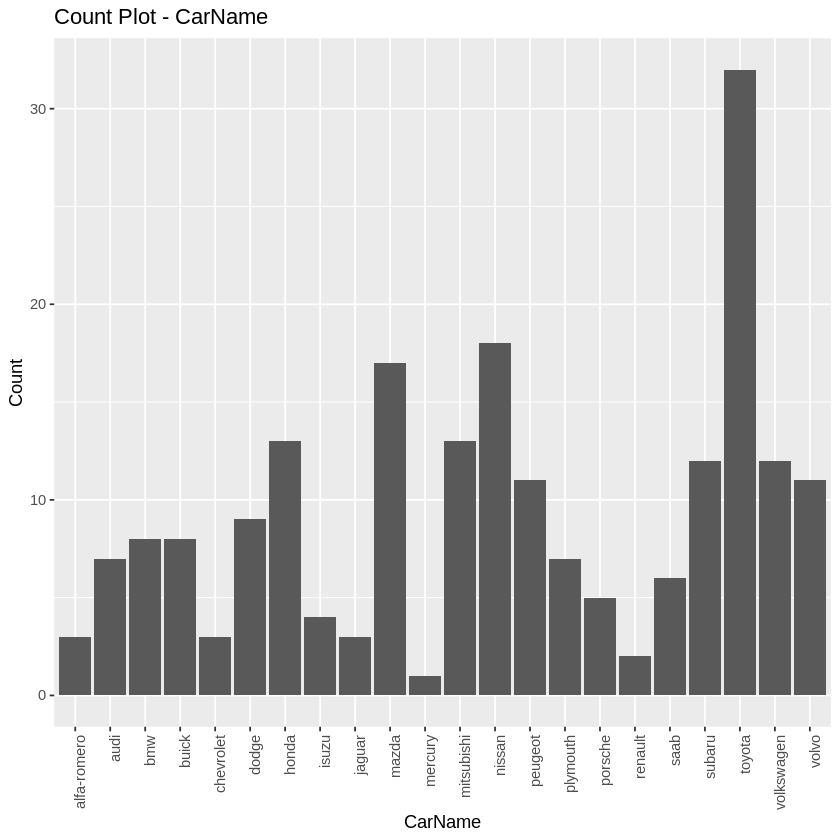

In [ ]:
# Load the ggplot2 package
library(ggplot2)

# Create a count plot
ggplot(df, aes(x = CarName)) +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Count Plot - CarName", x = "CarName", y = "Count")


In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



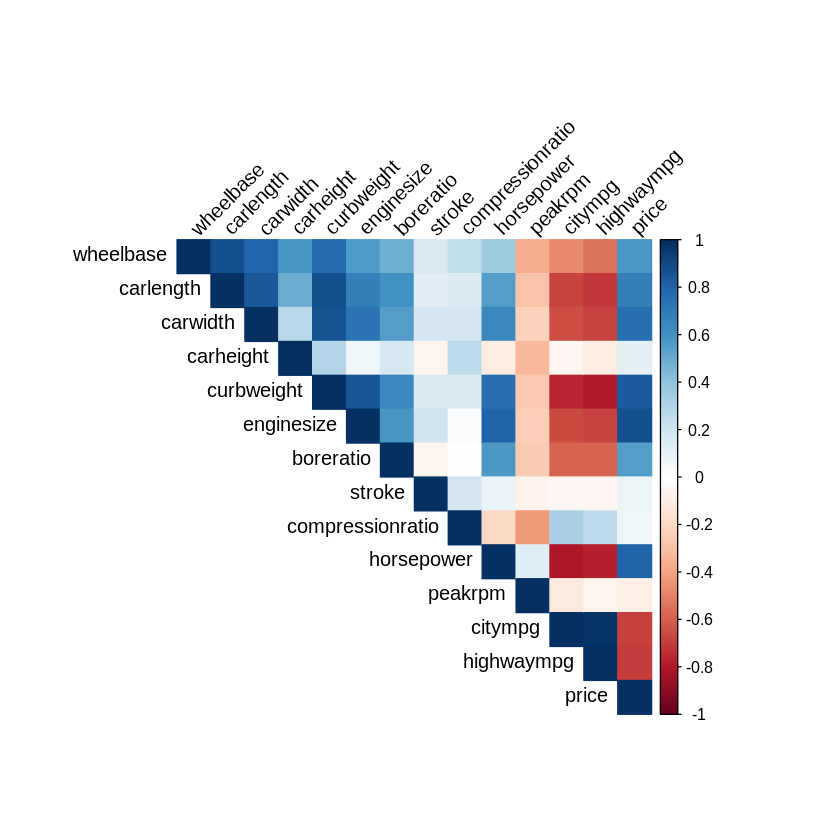

In [ ]:
library(corrplot)
numerical_columns <- sapply(df, is.numeric)
categorical_columns <- sapply(df,is.character)
correlation_matrix <- cor(df[, numerical_columns])
# Creating correlation heatmap
corrplot(correlation_matrix, method="color", type="upper", tl.col="black", tl.srt=45)

In [ ]:
df <- df %>%
  select(-car_ID, -symboling)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


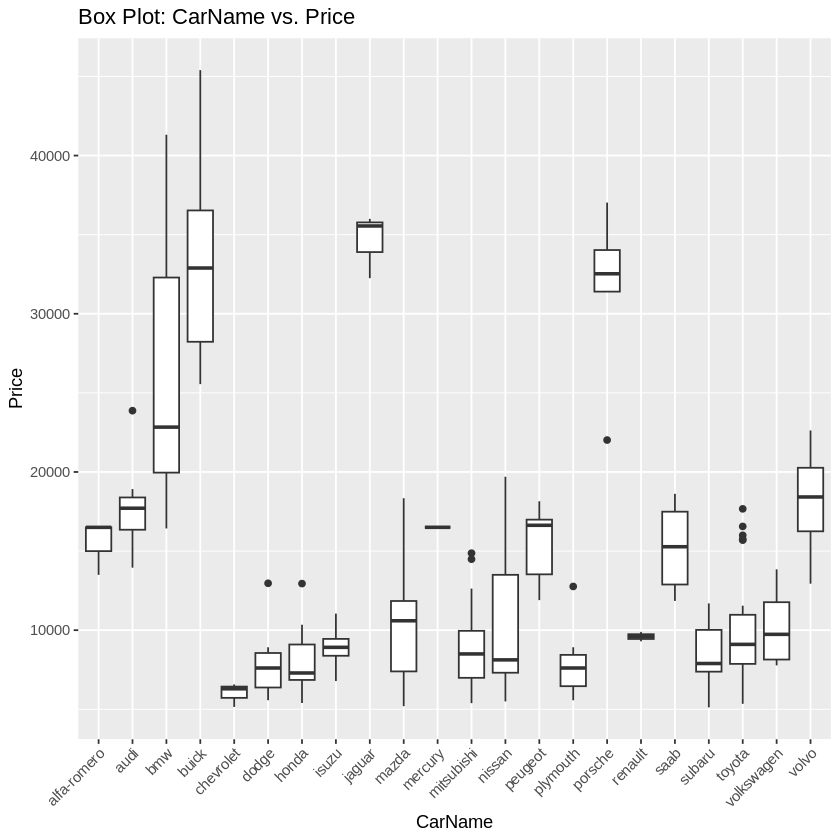

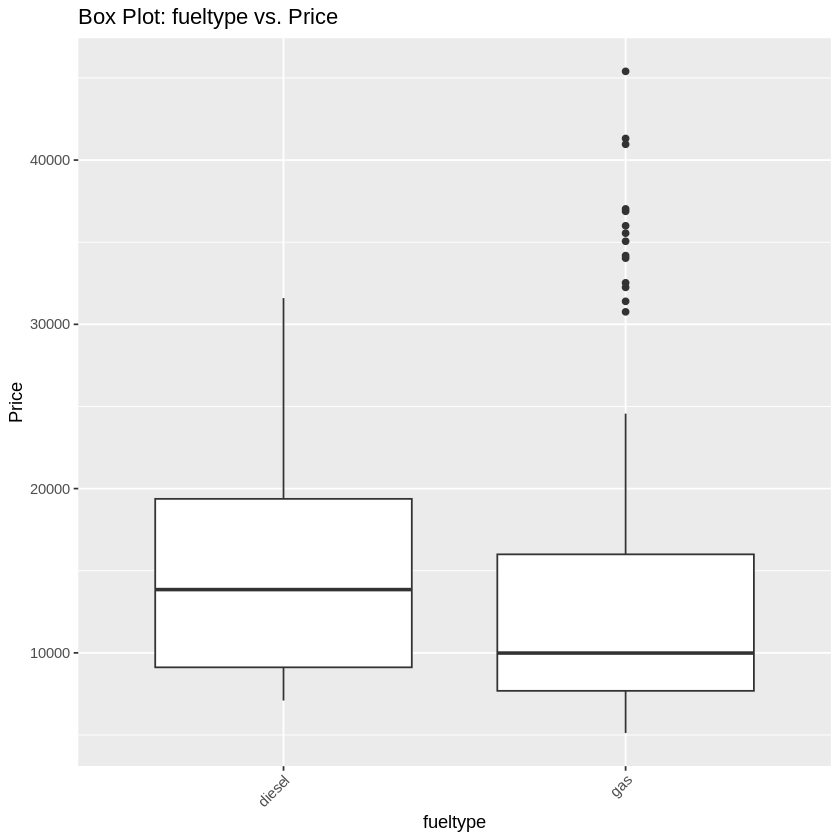

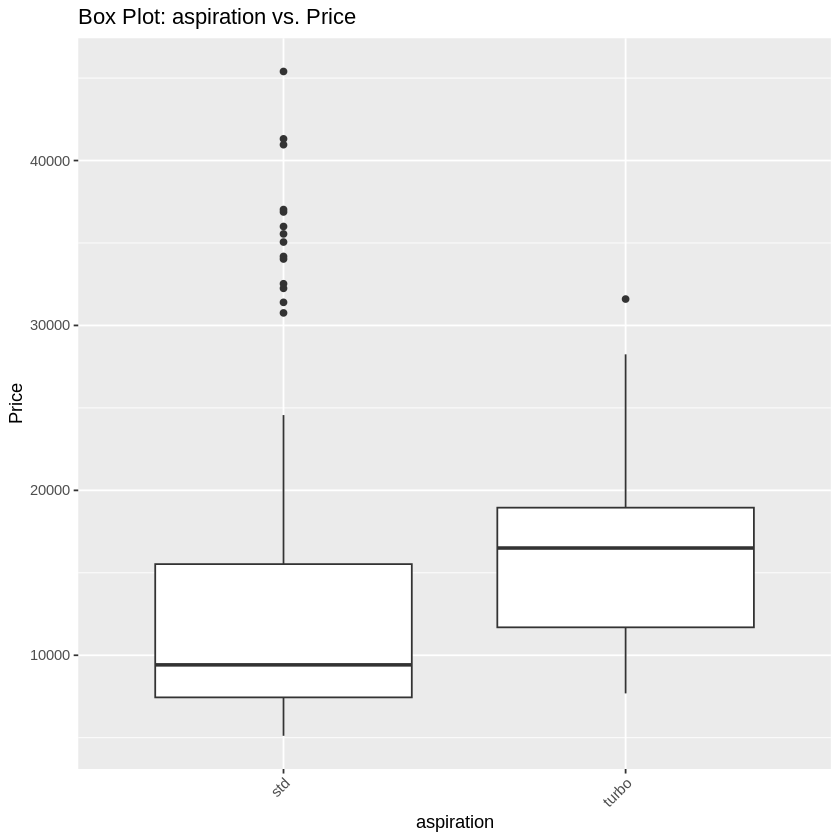

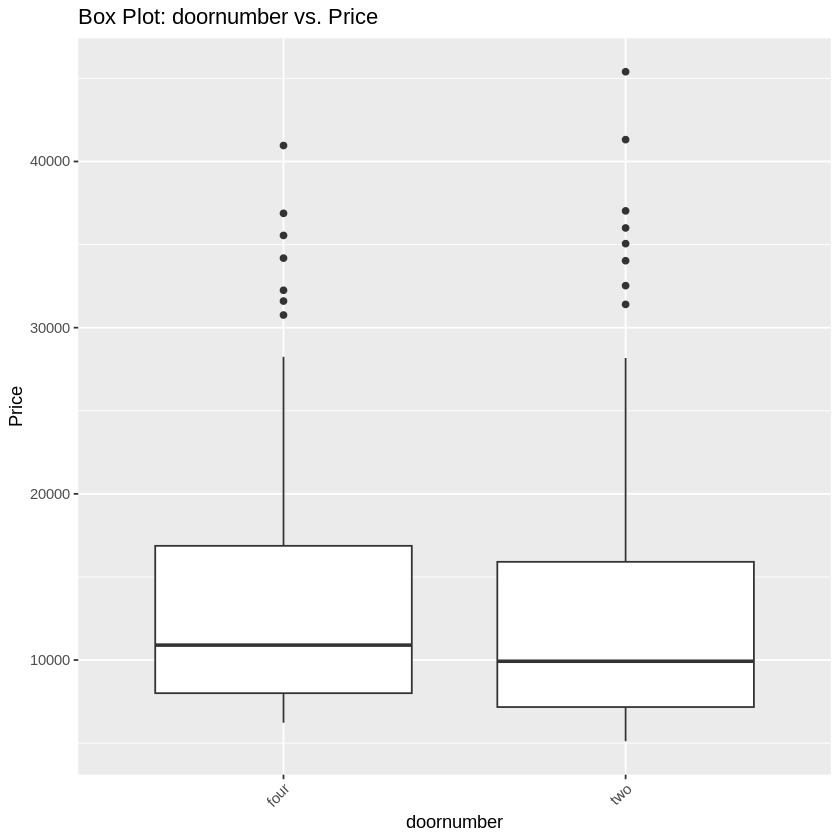

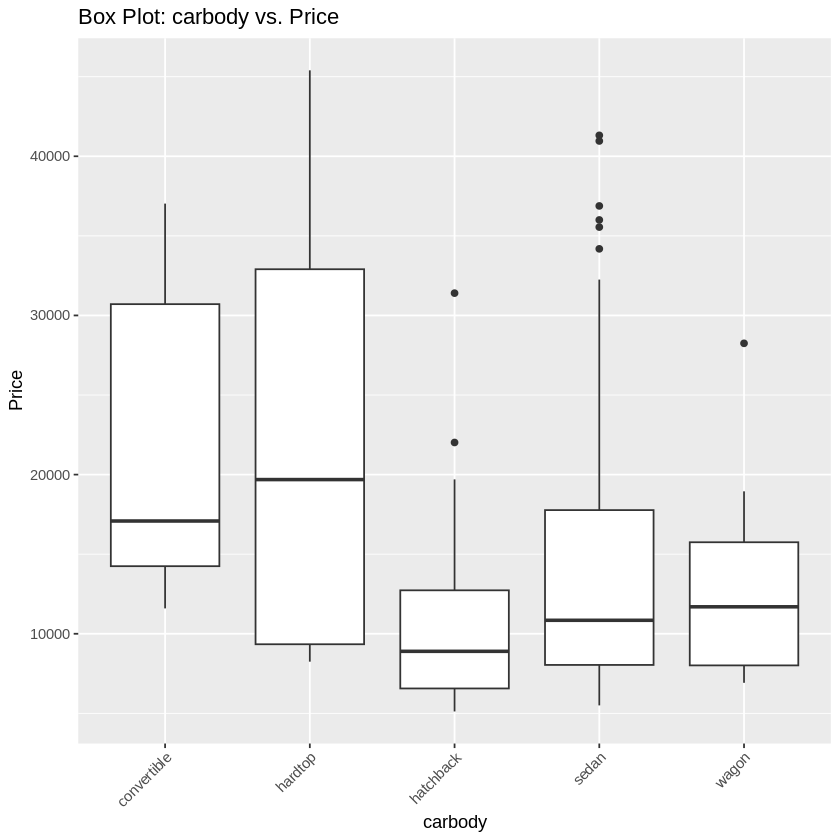

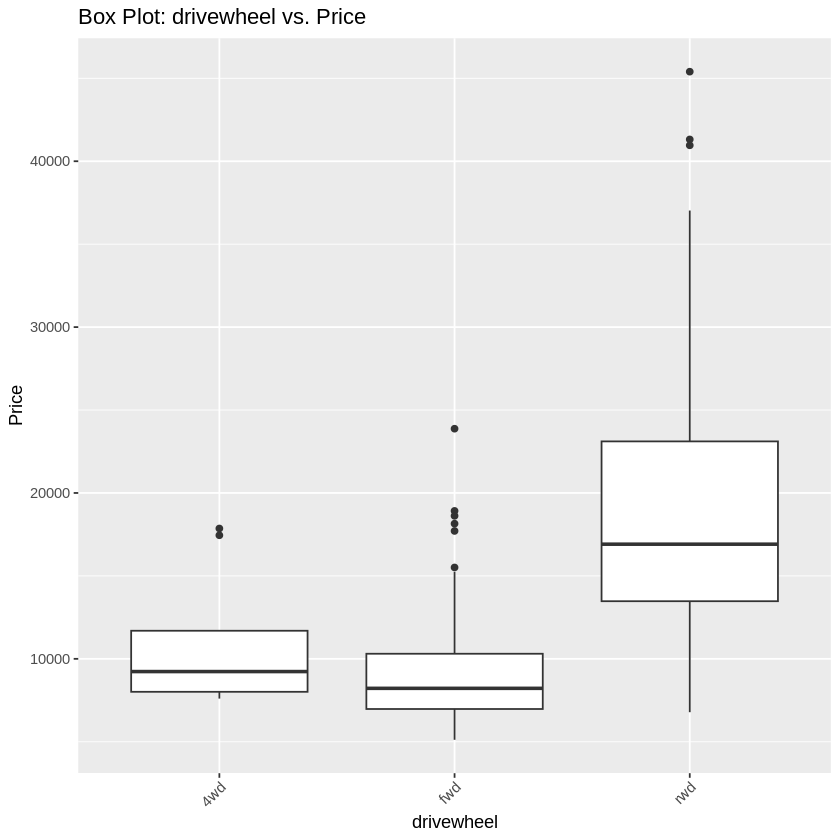

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


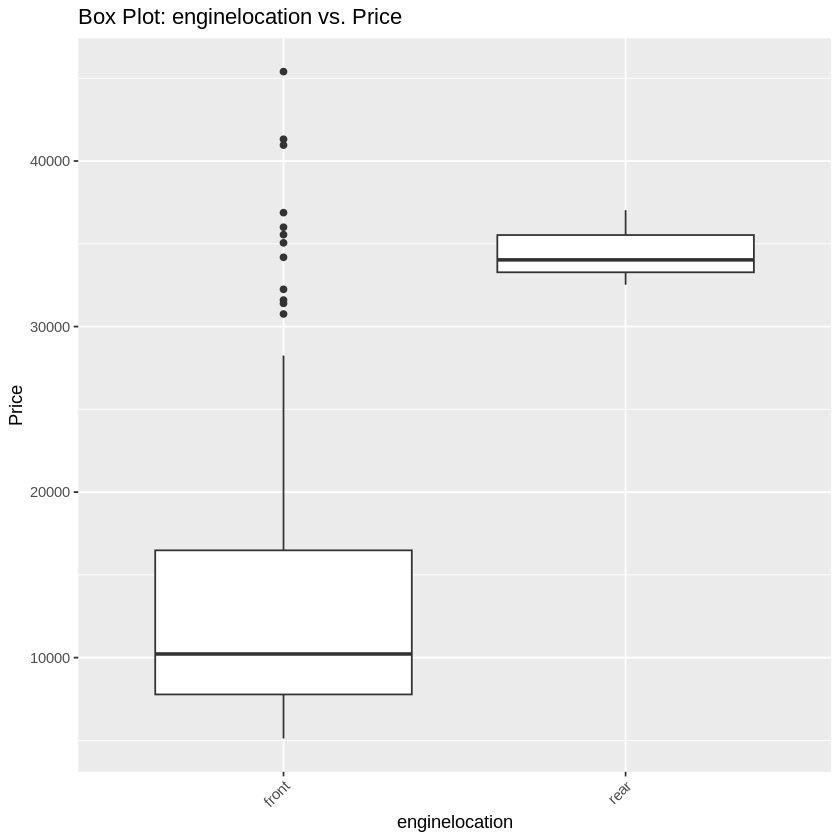

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


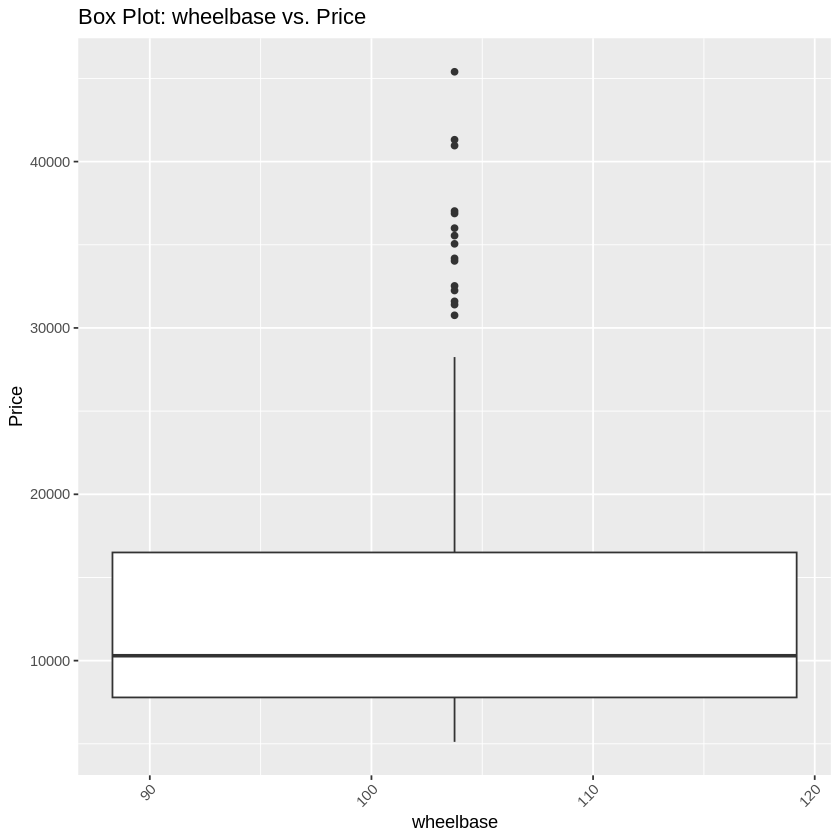

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


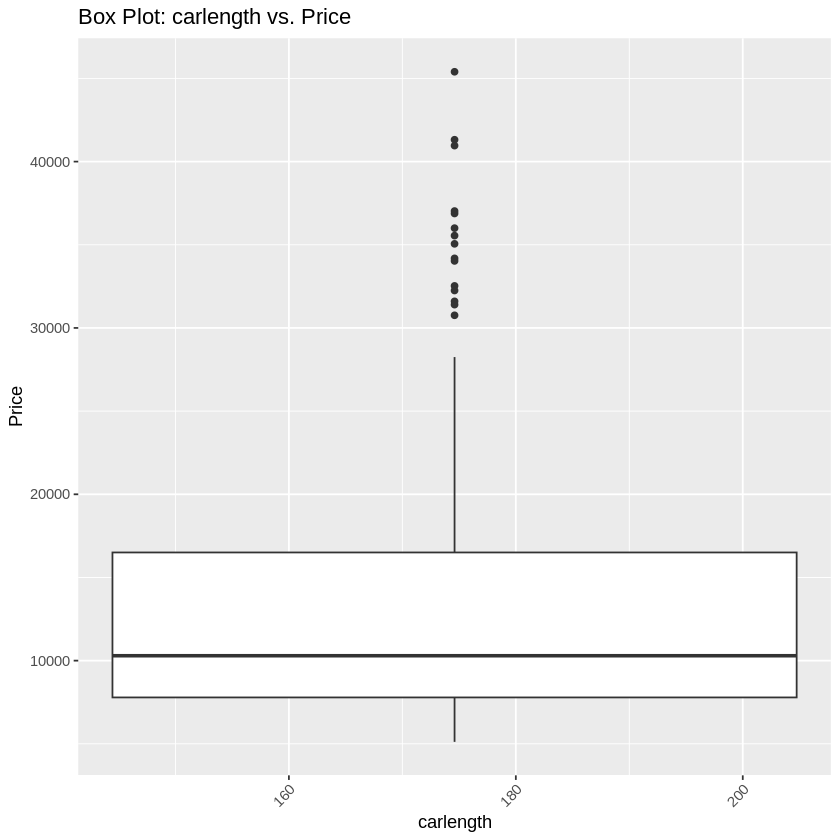

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


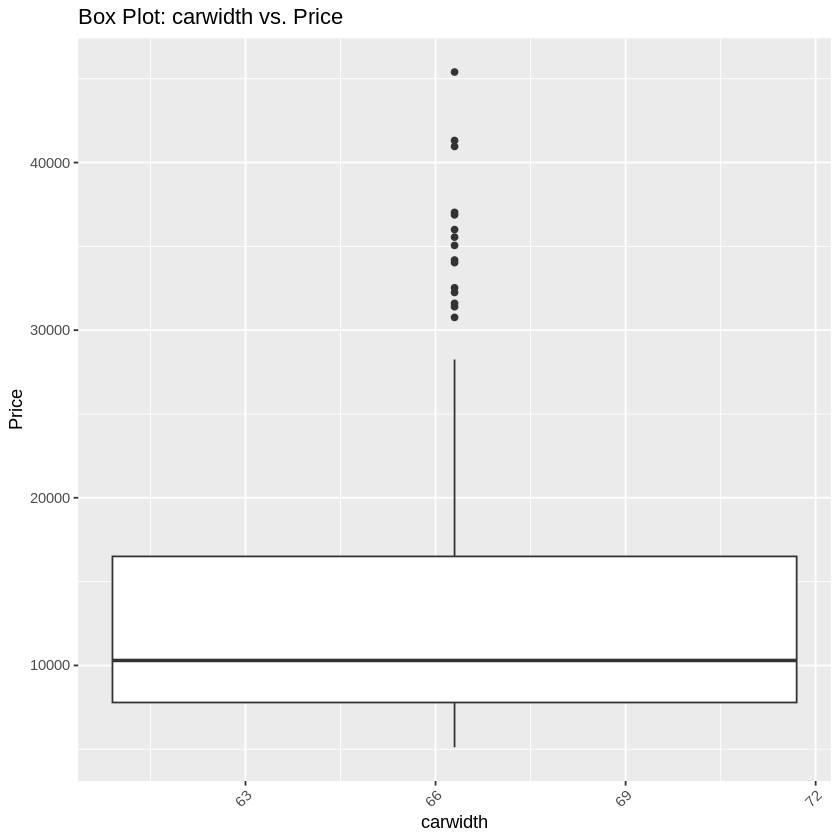

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


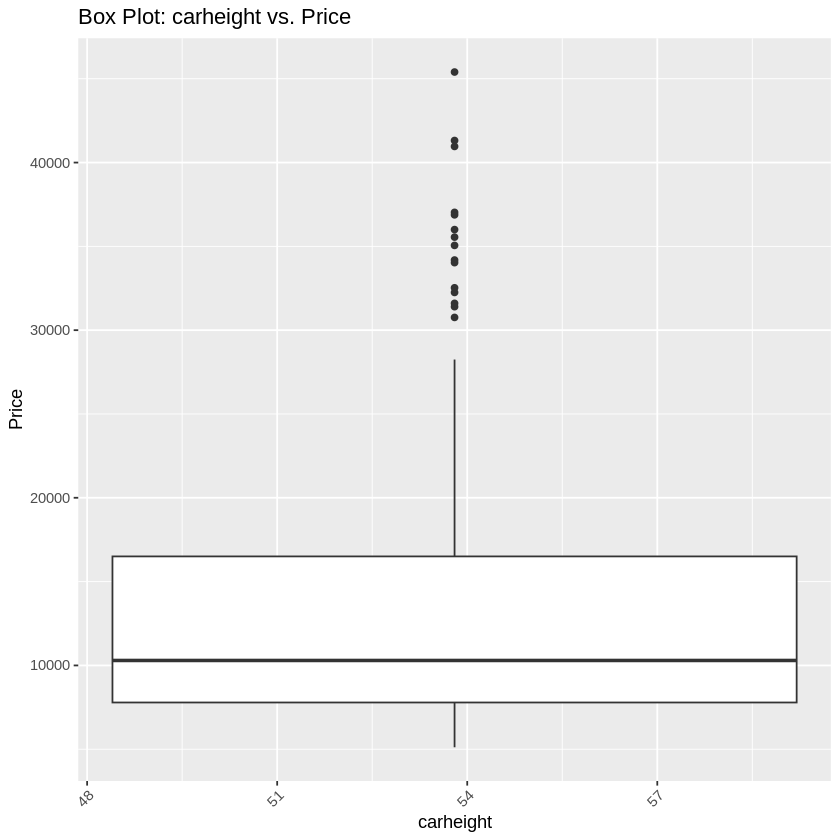

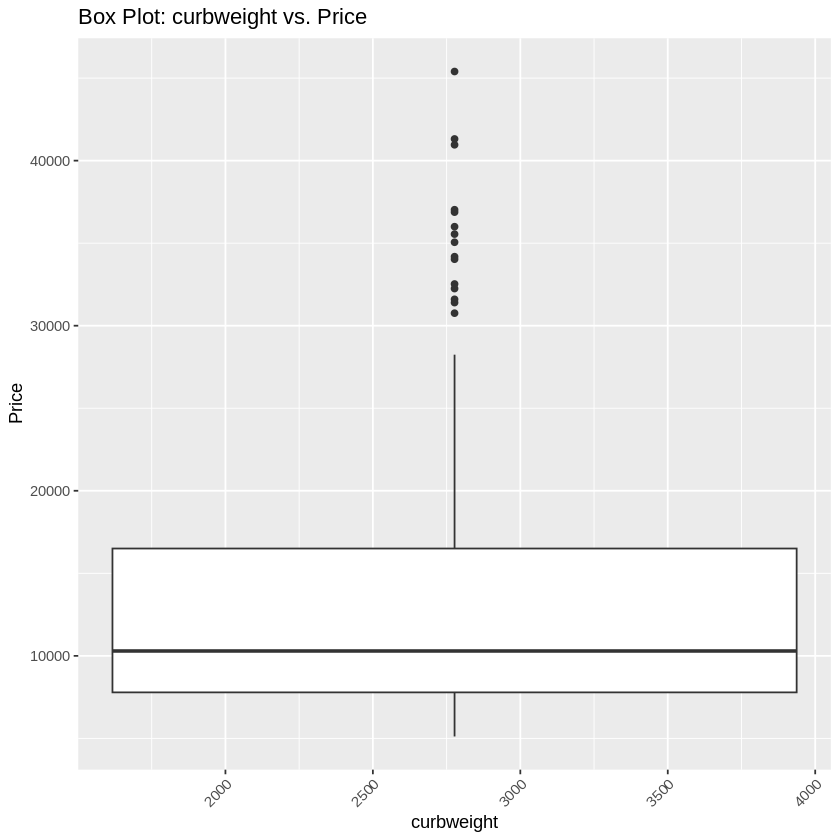

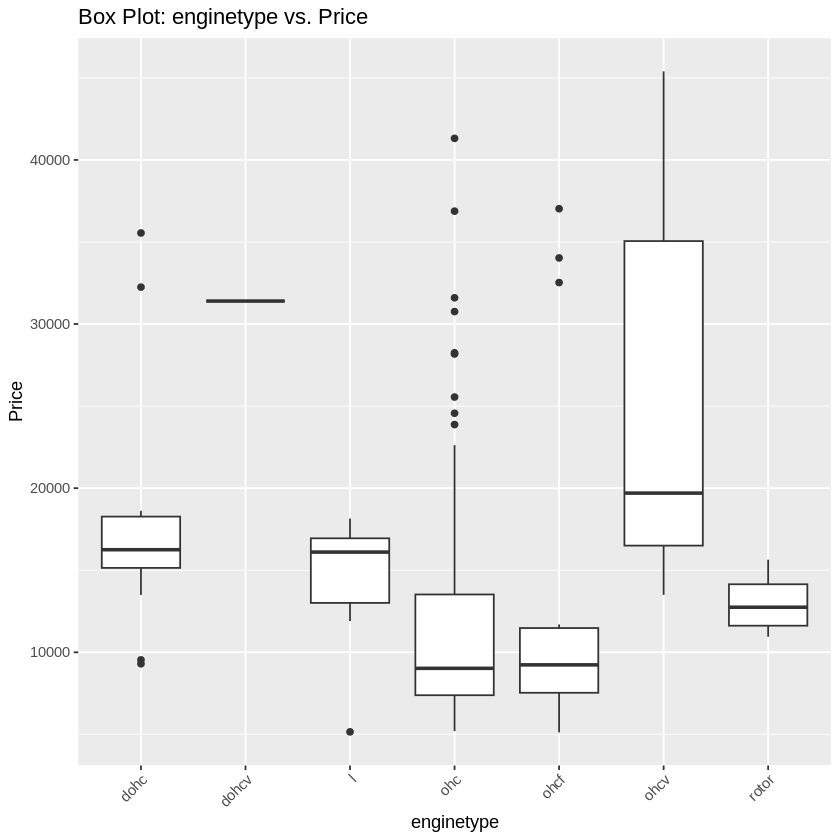

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


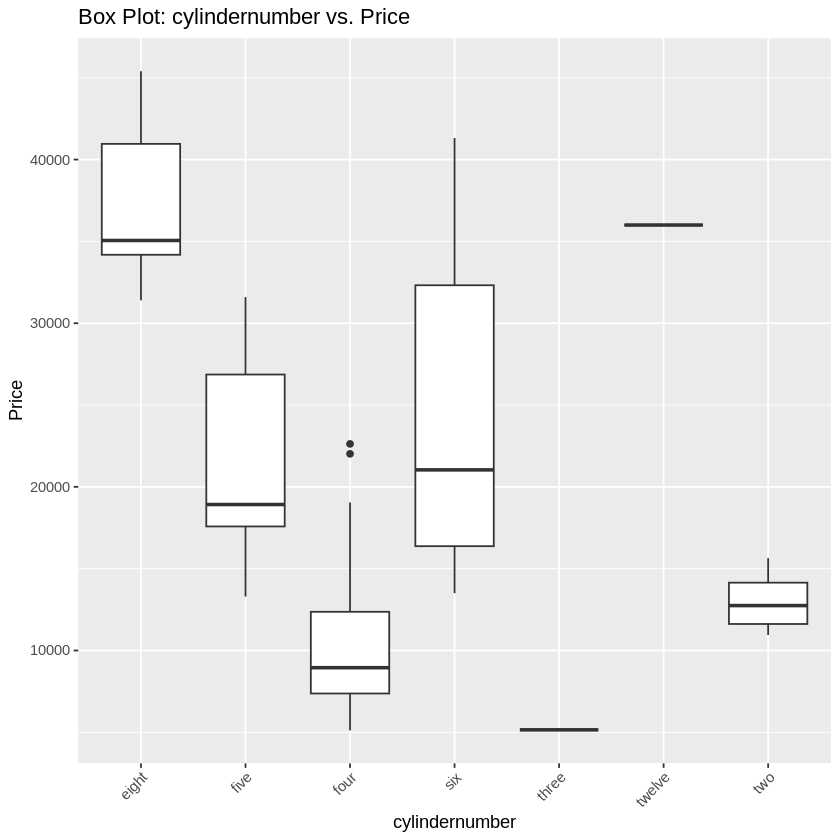

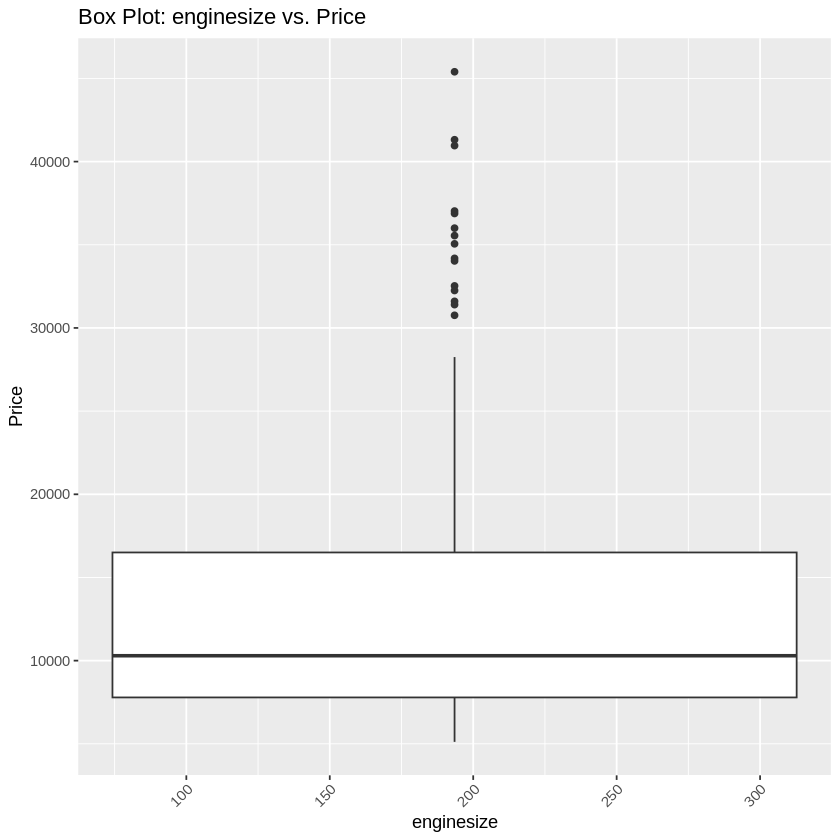

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


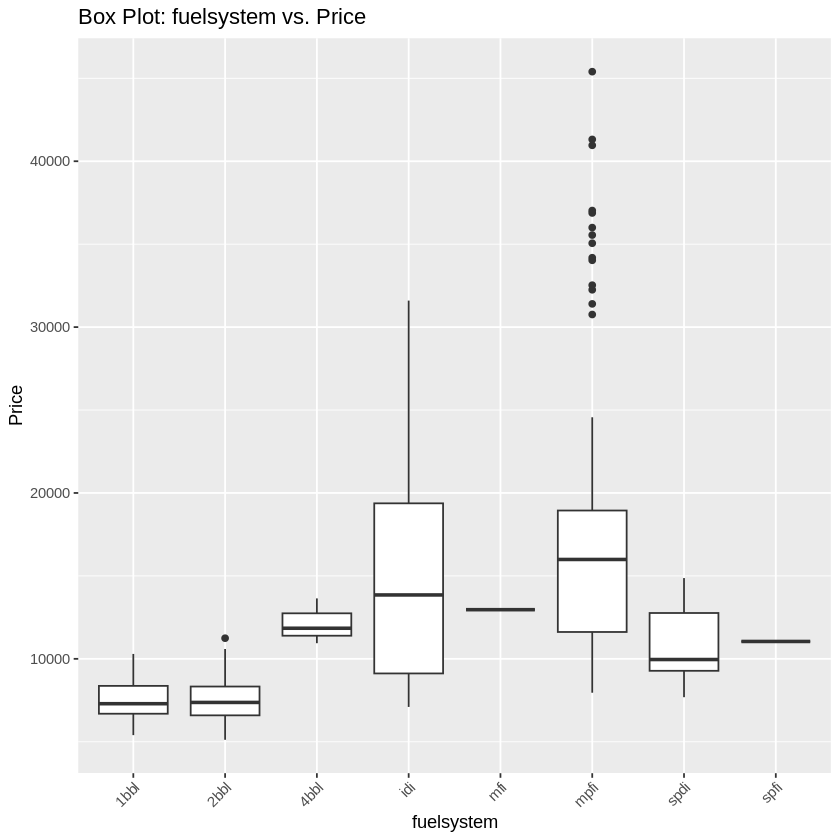

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


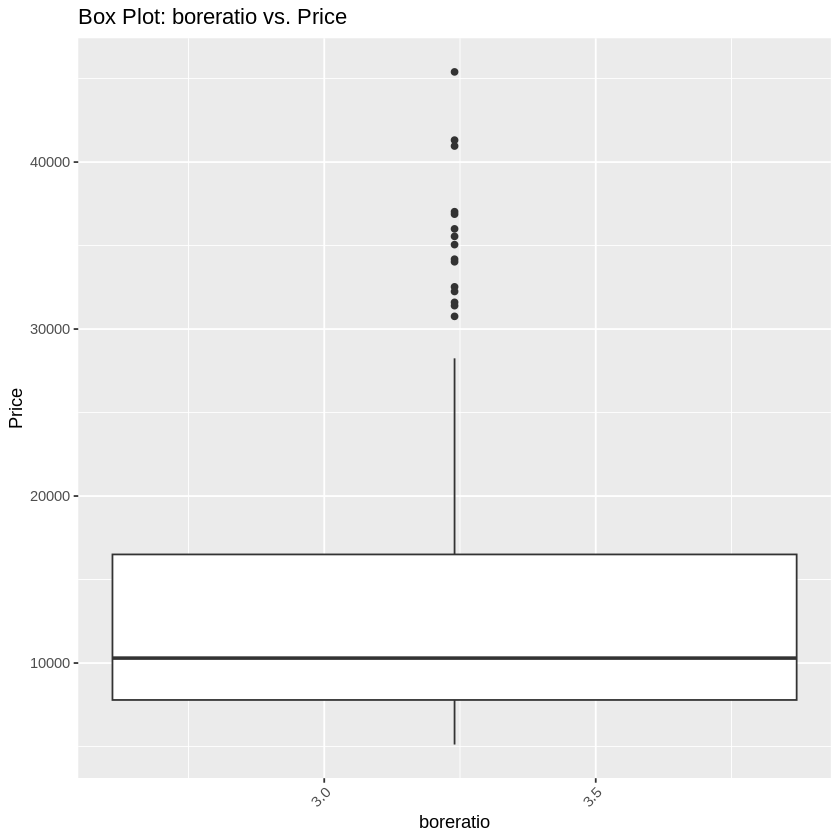

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


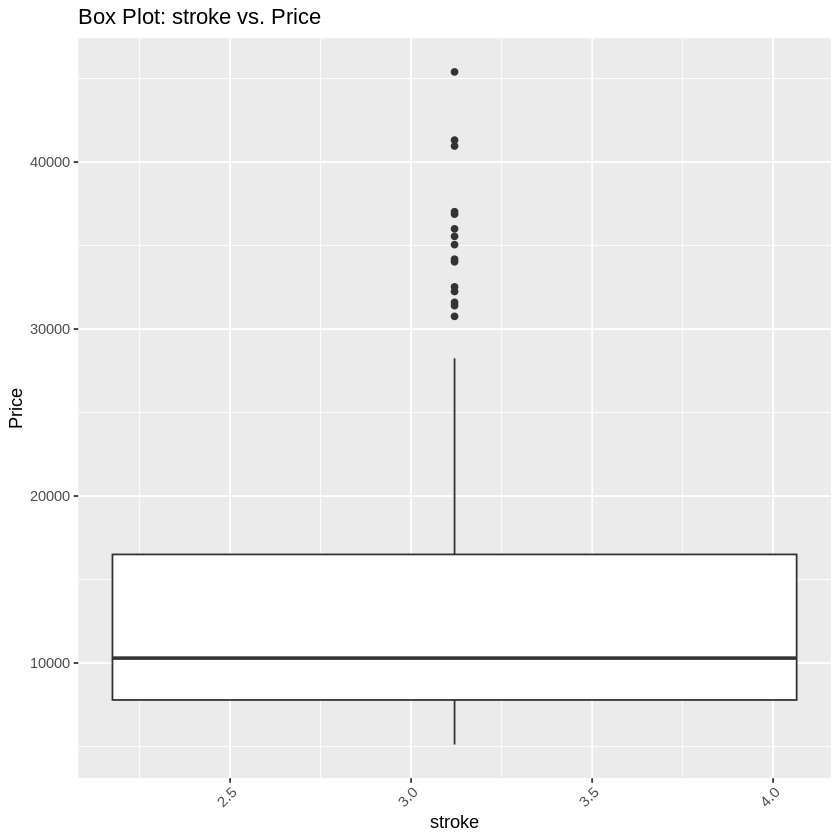

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


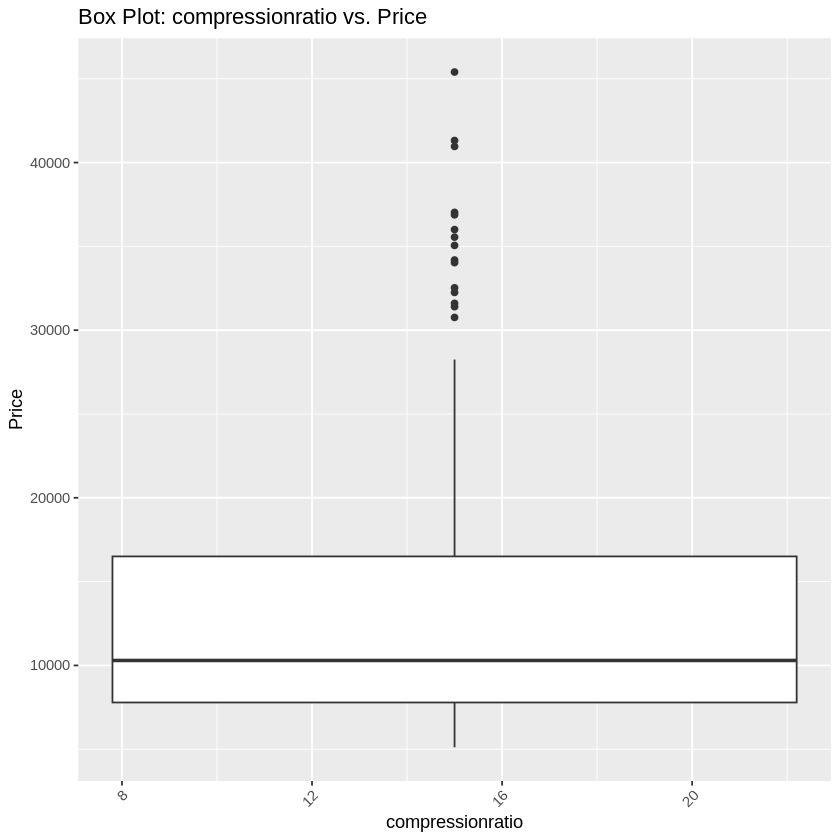

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


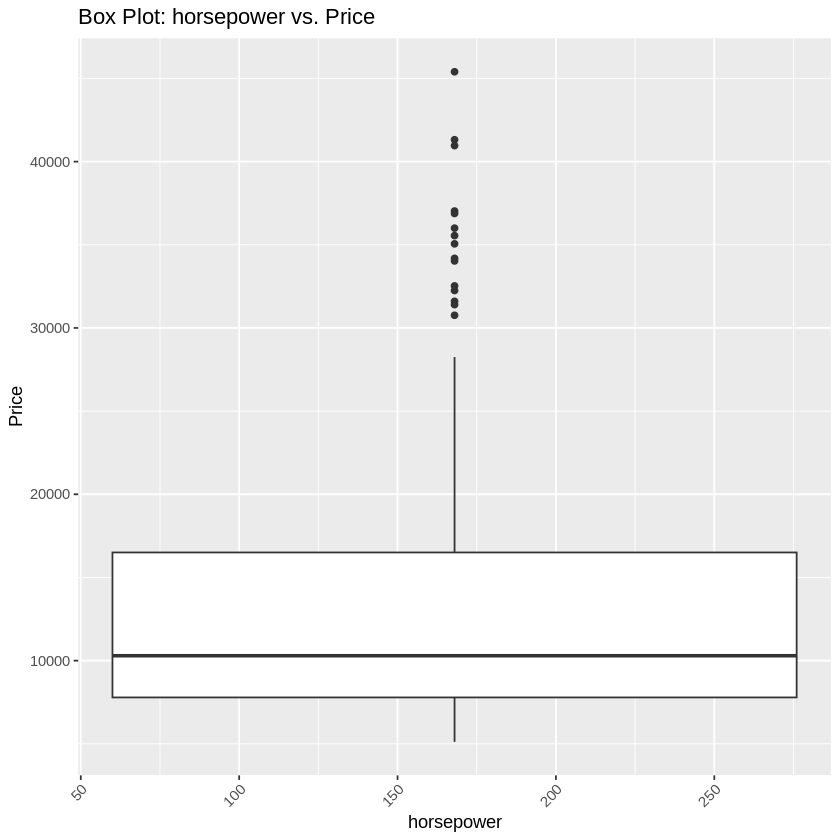

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


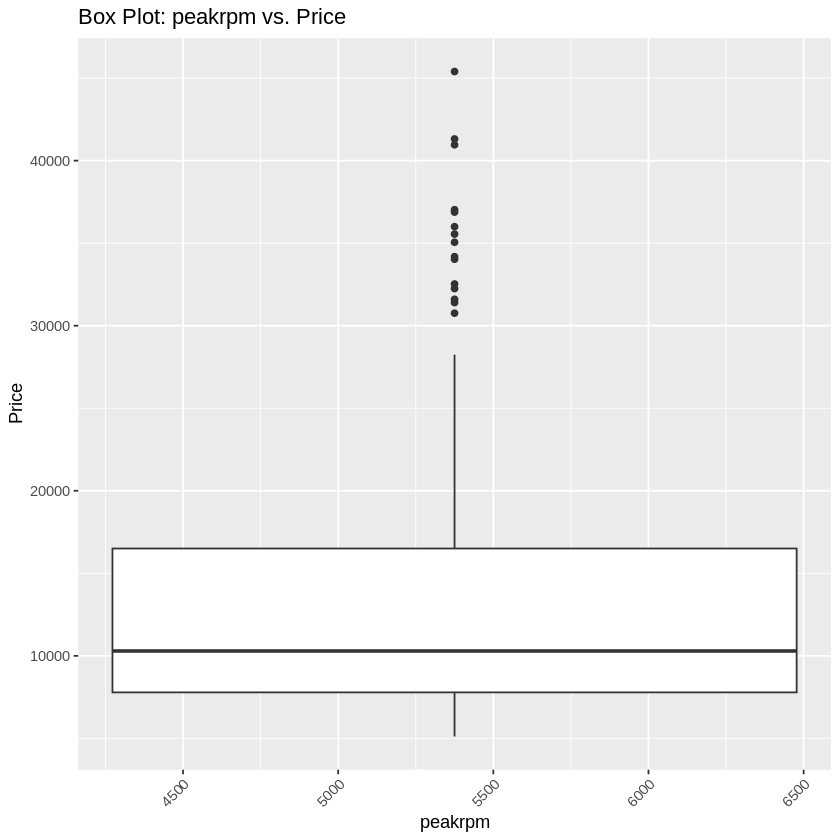

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


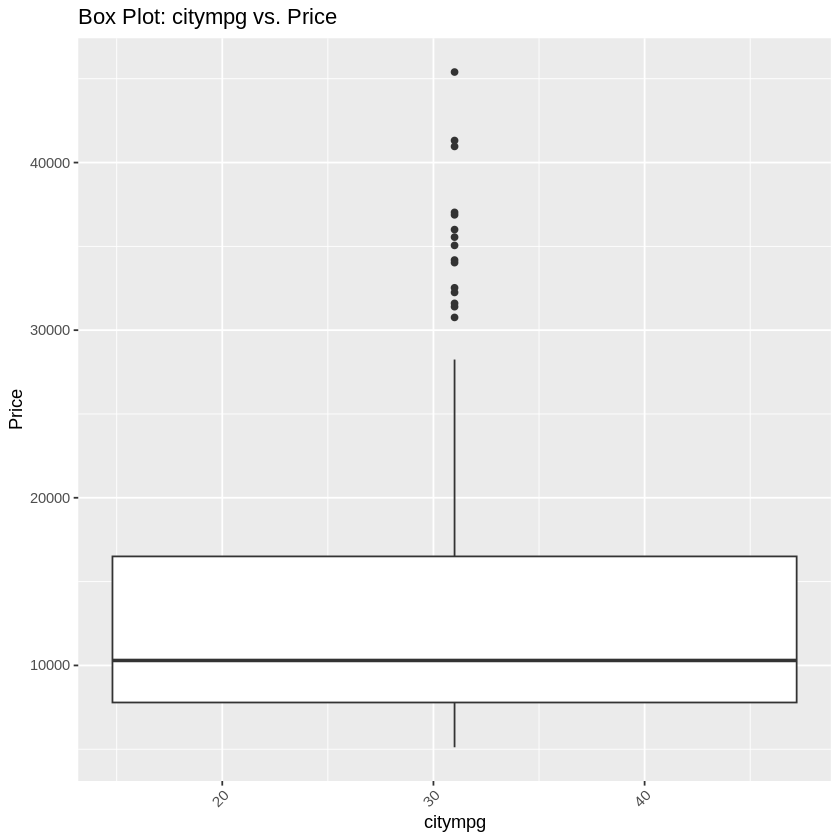

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


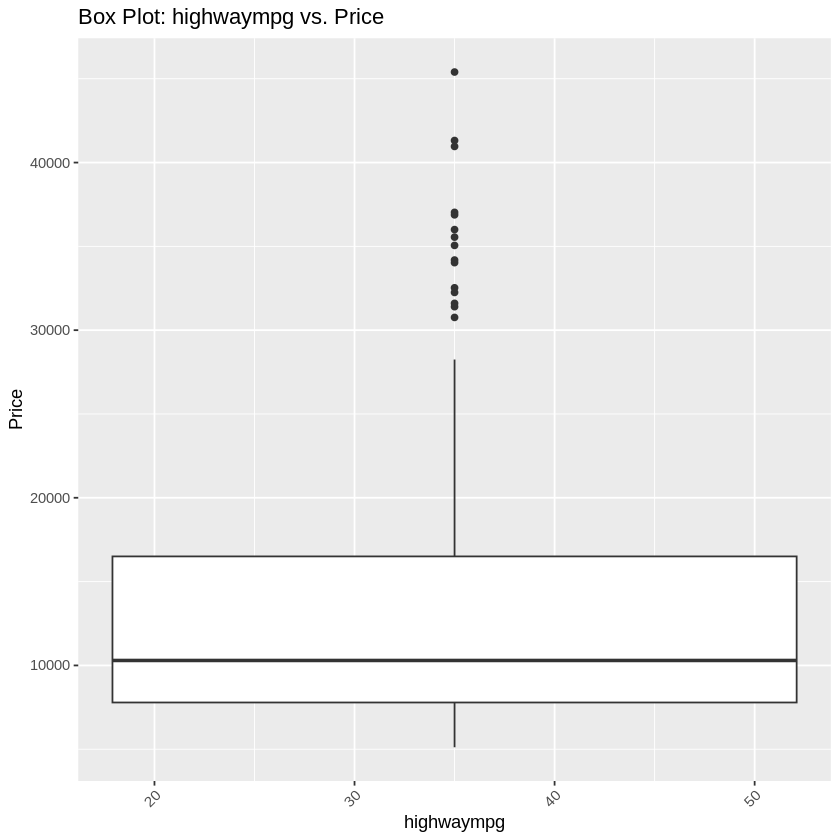

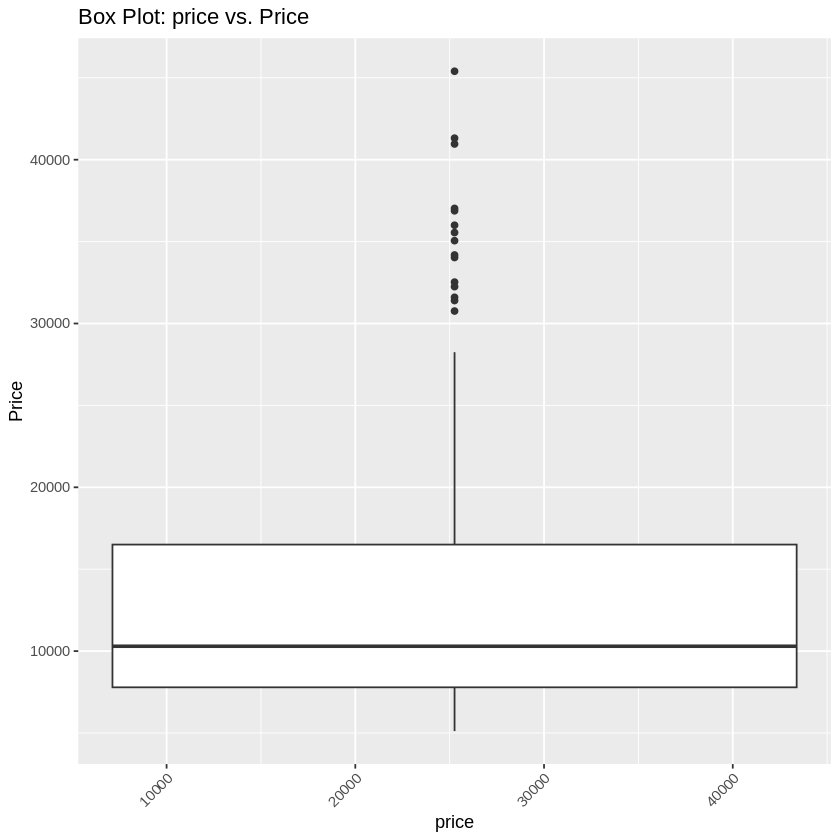

In [ ]:
# Load the ggplot2 package
library(ggplot2)

# Define a function to create box plots
create_boxplot <- function(df, column) {
  ggplot(df, aes_string(x = column, y = 'price')) +
    geom_boxplot() +
    labs(title = paste('Box Plot:', column, 'vs. Price'),
         x = column, y = 'Price') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Convert detected categorical columns to factors
for (column in names(df)) {
  if (is.factor(df[[column]])) {
    df[[column]] <- as.factor(df[[column]])
  }
}

# Create and print box plots for each column
for (column in names(df)) {
  plot <- create_boxplot(df, column)
  print(plot)
}


In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the caret package
library(caret)
# Load the scaler module
numerical_columns <- colnames(df)[sapply(df, is.numeric)]
scaler <- preProcess(df[numerical_columns], method = c("center", "scale"))
# Apply the scaler to numerical columns
df[numerical_columns] <- predict(scaler, df[numerical_columns])

In [ ]:
# Load the caret package
library(caret)

# Set seed for reproducibility
set.seed(42)

# Define predictor variables (excluding 'price' and 'CarName')
X <- df[, !(names(df) %in% c('price', 'CarName'))]

# Define target variable
y <- df$price

# Perform train-test split
split <- createDataPartition(y, p = 0.8, list = FALSE)

# Create training and testing sets
X_train <- X[split, ]
X_test <- X[-split, ]
y_train <- y[split]
y_test <- y[-split]


### Data Cleaning and model training

In [ ]:
# Combine X_train and y_train
train_data <- cbind(X_train, price = y_train)
# Fit linear regression model
model <- lm(price ~ ., data = train_data)

### Coefficient of Determination, Intercept and Coefficients

In [ ]:
# Print the model summary
summary(model)


Call:
lm(formula = price ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61624 -0.13110 -0.00345  0.12173  1.13535 

Coefficients: (2 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.746948   0.977597   2.810 0.005754 ** 
fueltypegas          -2.055650   0.975924  -2.106 0.037173 *  
aspirationturbo       0.114863   0.119289   0.963 0.337456    
doornumbertwo         0.015373   0.074112   0.207 0.836011    
carbodyhardtop        0.006369   0.210099   0.030 0.975867    
carbodyhatchback     -0.388746   0.185108  -2.100 0.037730 *  
carbodysedan         -0.220655   0.197507  -1.117 0.266053    
carbodywagon         -0.319290   0.212044  -1.506 0.134650    
drivewheelfwd         0.018496   0.152220   0.122 0.903482    
drivewheelrwd         0.149861   0.171725   0.873 0.384511    
enginelocationrear    0.831974   0.371086   2.242 0.026725 *  
wheelbase             0.073332   0

# **Conclusion**

Therefore, we have successfully performed multiple linear regression on car [dataset](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data) in python as well as in R language.We have implemented data cleaning on the given dataset as it was not cleaned and performed some preprocessing like dropping cloumns having least effect on the target variable for eg. car id. We have used matplotlib and seaborn for visualization purpose like visualizing how categorical variable effect the target variable.